In [1]:
import tensorflow as tf

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

# Preprocesamiento

In [3]:
directories = []
base_path = "./malimg_paper_dataset_imgs/"
for x in os.walk(base_path):
    if x[0] != base_path:
        directories.append(x[0])
        print(x[0])

./malimg_paper_dataset_imgs/Swizzor.gen!I
./malimg_paper_dataset_imgs/Instantaccess
./malimg_paper_dataset_imgs/Dialplatform.B
./malimg_paper_dataset_imgs/Autorun.K
./malimg_paper_dataset_imgs/Dontovo.A
./malimg_paper_dataset_imgs/C2LOP.gen!g
./malimg_paper_dataset_imgs/C2LOP.P
./malimg_paper_dataset_imgs/Lolyda.AA1
./malimg_paper_dataset_imgs/Lolyda.AT
./malimg_paper_dataset_imgs/Adialer.C
./malimg_paper_dataset_imgs/Fakerean
./malimg_paper_dataset_imgs/Rbot!gen
./malimg_paper_dataset_imgs/Allaple.A
./malimg_paper_dataset_imgs/VB.AT
./malimg_paper_dataset_imgs/Yuner.A
./malimg_paper_dataset_imgs/Malex.gen!J
./malimg_paper_dataset_imgs/Swizzor.gen!E
./malimg_paper_dataset_imgs/Agent.FYI
./malimg_paper_dataset_imgs/Skintrim.N
./malimg_paper_dataset_imgs/Obfuscator.AD
./malimg_paper_dataset_imgs/Lolyda.AA2
./malimg_paper_dataset_imgs/Lolyda.AA3
./malimg_paper_dataset_imgs/Wintrim.BX
./malimg_paper_dataset_imgs/Allaple.L
./malimg_paper_dataset_imgs/Alueron.gen!J


In [5]:
families_mapped = {}
for directory in directories:
    family = directory[len(base_path):]
    files = []
    for walk in os.walk(directory):
        for fileName in walk[2]:
            load_image = tf.keras.preprocessing.image.load_img(directory+"/"+fileName)
            files.append(load_image)
#             print(directory+"/"+fileName)
    families_mapped[family] = files
    

### Numero de muestras por familia

In [5]:
for key in families_mapped:
    print("La familia ", key, " tiene un total de ", str(len(families_mapped[key])), " ejemplares.")

La familia  Swizzor.gen!I  tiene un total de  132  ejemplares.
La familia  Instantaccess  tiene un total de  431  ejemplares.
La familia  Dialplatform.B  tiene un total de  177  ejemplares.
La familia  Autorun.K  tiene un total de  106  ejemplares.
La familia  Dontovo.A  tiene un total de  162  ejemplares.
La familia  C2LOP.gen!g  tiene un total de  200  ejemplares.
La familia  C2LOP.P  tiene un total de  146  ejemplares.
La familia  Lolyda.AA1  tiene un total de  213  ejemplares.
La familia  Lolyda.AT  tiene un total de  159  ejemplares.
La familia  Adialer.C  tiene un total de  122  ejemplares.
La familia  Fakerean  tiene un total de  381  ejemplares.
La familia  Rbot!gen  tiene un total de  158  ejemplares.
La familia  Allaple.A  tiene un total de  2949  ejemplares.
La familia  VB.AT  tiene un total de  408  ejemplares.
La familia  Yuner.A  tiene un total de  800  ejemplares.
La familia  Malex.gen!J  tiene un total de  136  ejemplares.
La familia  Swizzor.gen!E  tiene un total de  1

In [6]:
# Total de familias
len(families_mapped.keys())

25

### Ploteo

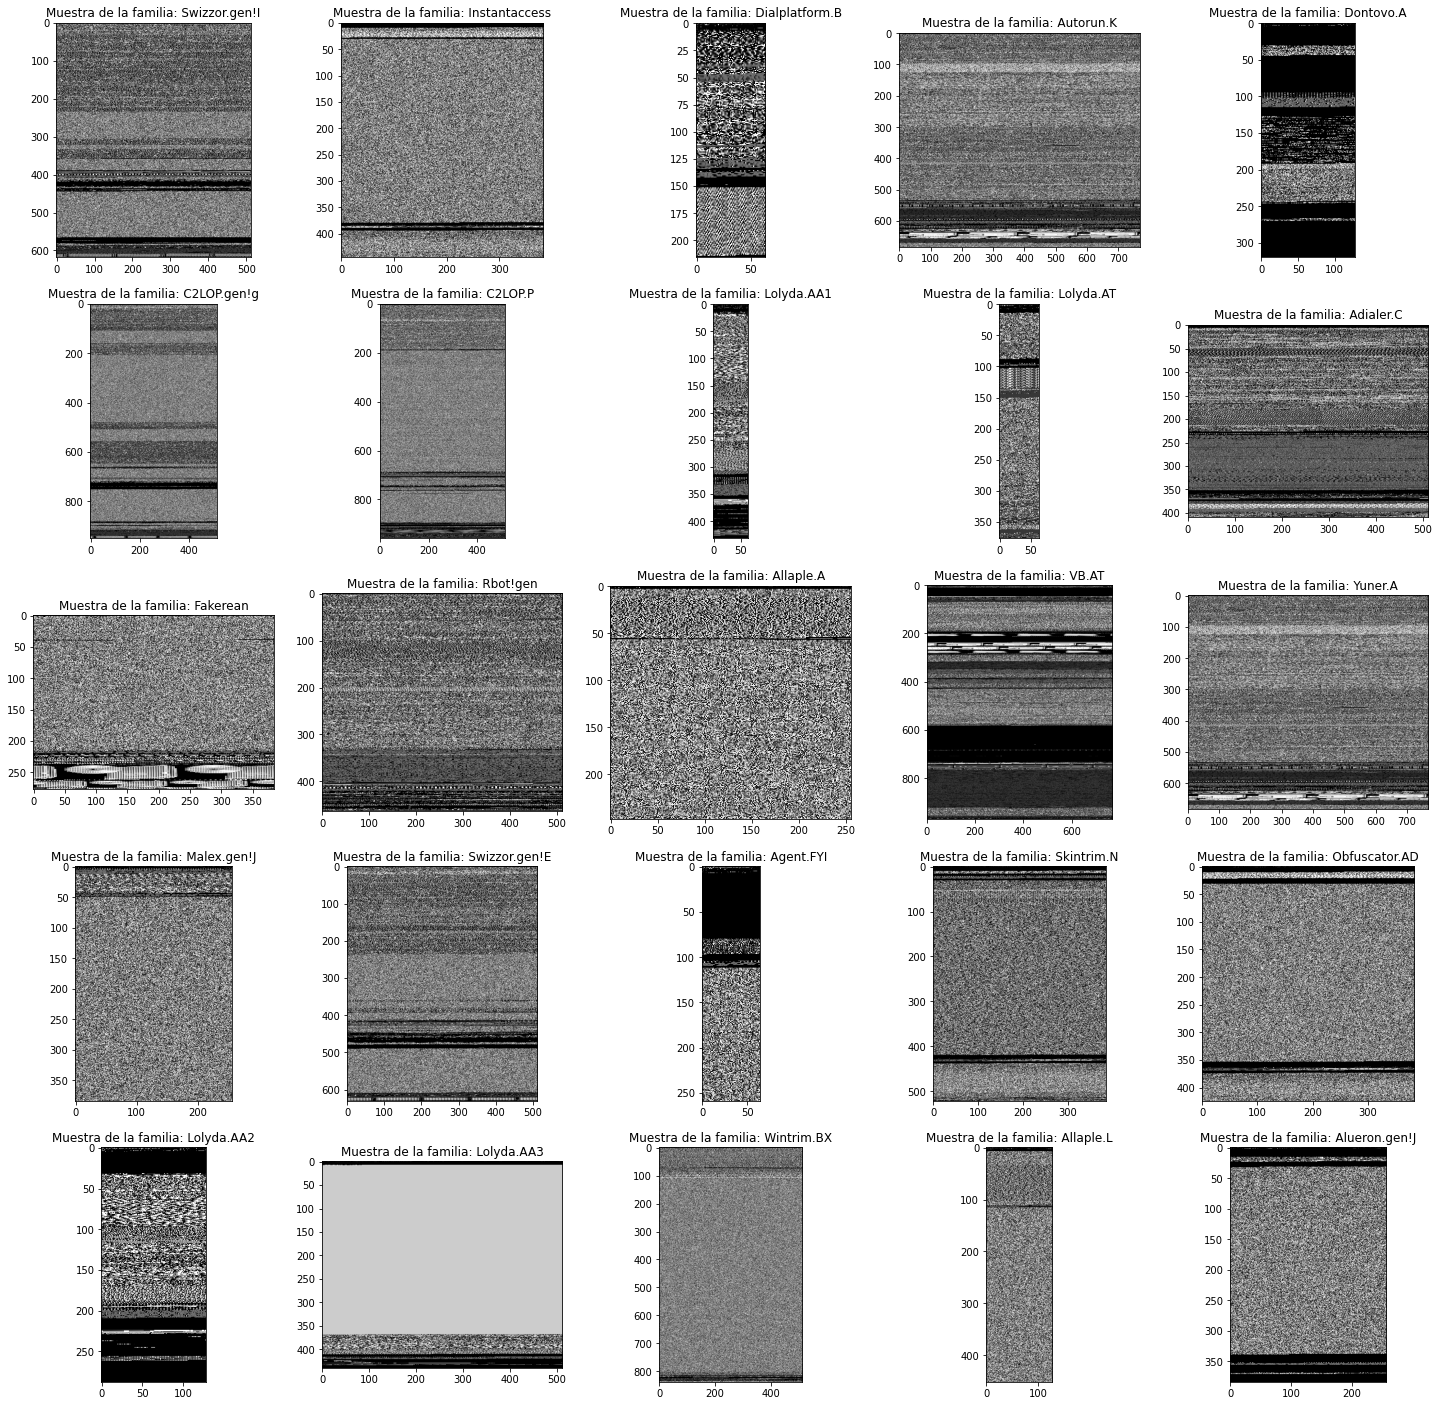

In [7]:
fig = plt.figure(figsize=(25, 25))
for index, family in enumerate(families_mapped):
    ax1 = fig.add_subplot(5,5,index+1)
    ax1.title.set_text("Muestra de la familia: " + family)
    ax1.imshow(families_mapped[family][0])

plt.show()

In [9]:
families_mapped["Swizzor.gen!I"]

[<PIL.Image.Image image mode=RGB size=512x618>,
 <PIL.Image.Image image mode=RGB size=512x954>,
 <PIL.Image.Image image mode=RGB size=768x760>,
 <PIL.Image.Image image mode=RGB size=512x690>,
 <PIL.Image.Image image mode=RGB size=512x529>,
 <PIL.Image.Image image mode=RGB size=512x657>,
 <PIL.Image.Image image mode=RGB size=512x510>,
 <PIL.Image.Image image mode=RGB size=512x638>,
 <PIL.Image.Image image mode=RGB size=512x524>,
 <PIL.Image.Image image mode=RGB size=512x656>,
 <PIL.Image.Image image mode=RGB size=512x598>,
 <PIL.Image.Image image mode=RGB size=512x583>,
 <PIL.Image.Image image mode=RGB size=512x552>,
 <PIL.Image.Image image mode=RGB size=512x587>,
 <PIL.Image.Image image mode=RGB size=512x677>,
 <PIL.Image.Image image mode=RGB size=512x600>,
 <PIL.Image.Image image mode=RGB size=512x573>,
 <PIL.Image.Image image mode=RGB size=512x598>,
 <PIL.Image.Image image mode=RGB size=512x504>,
 <PIL.Image.Image image mode=RGB size=512x597>,
 <PIL.Image.Image image mode=RGB size=51

### Estandarizar a un tamaño se usara el mas grande

In [6]:
def save_resized(image_path):
    basewidth = 200 # MNIST image width
    img = Image.open(base_path+image_path)
    wpercent = (basewidth/float(img.size[0]))
    hsize = basewidth
    img =  img.resize((basewidth,hsize), Image.ANTIALIAS)

    # Save image or feed directly to tensorflow 
    img.save('resized/'+image_path) 

In [8]:
for directory in directories:
    family = directory[len(base_path):]
    os.makedirs("resized/"+family, exist_ok=True) 
    for walk in os.walk(directory):
        for fileName in walk[2]:
            final_path = directory+"/"+fileName
            image_path = final_path[len(base_path):]
            save_resized(image_path)


/var/folders/r4/363xgjwj3vl40jx0mslxwh_m0000gn/T/ipykernel_2126/1550084390.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img =  img.resize((basewidth,hsize), Image.ANTIALIAS)


## Creación del modelo

In [19]:
input_shape_s = 200
normalization_layer = tf.keras.layers.Rescaling(1./255)

model = tf.keras.Sequential([
    normalization_layer,
    tf.keras.layers.Flatten(input_shape=(input_shape_s, input_shape_s)),
    tf.keras.layers.Dense(260, activation='relu'),
    tf.keras.layers.Dense(25)
])

### Creación del dataset
30 porciento de pruebas y 70% de entrenamiento

In [10]:
training = tf.keras.utils.image_dataset_from_directory(
  "./resized/",
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(input_shape_s, input_shape_s),
)
validation = tf.keras.utils.image_dataset_from_directory(
  "./resized/",
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(input_shape_s, input_shape_s),
)

Found 9339 files belonging to 25 classes.
Using 6538 files for training.


2022-05-23 20:50:24.429229: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 9339 files belonging to 25 classes.
Using 2801 files for validation.


In [18]:
train_np_np = list(training.as_numpy_iterator())
# train_np_np

In [31]:
print(len(train_np_np))
print(len(train_np_np[0]))
print(len(train_np_np[0][0]))
print(len(train_np_np[0][0][0]))
print(len(train_np_np[0][0][0][0]))
print(len(train_np_np[0][0][0][0][0]))

205
2
32
500
500
3


In [72]:
# train_images
# normalization_layer_validation = tf.keras.layers.Rescaling(1./255)
# normalized_test = validation.map(lambda x, y: (normalization_layer_validation(x), y))
for image_batch, labels_batch in validation:
    validation_images = image_batch
    validation_labels = labels_batch
    break

In [73]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [23]:
model.fit(
  training,
  epochs=10
)

Epoch 1/10
205/205 [==============================] - 162s 780ms/step - loss: 53.7885 - accuracy: 0.7121
Epoch 2/10
205/205 [==============================] - 141s 687ms/step - loss: 2.6748 - accuracy: 0.8981
Epoch 3/10
205/205 [==============================] - 138s 671ms/step - loss: 2.4559 - accuracy: 0.9093
Epoch 4/10
205/205 [==============================] - 134s 652ms/step - loss: 0.8189 - accuracy: 0.9532
Epoch 5/10
205/205 [==============================] - 1943s 10s/step - loss: 1.1972 - accuracy: 0.9258
Epoch 6/10
205/205 [==============================] - 258s 1s/step - loss: 0.2331 - accuracy: 0.9763
Epoch 7/10
205/205 [==============================] - 259s 1s/step - loss: 0.5305 - accuracy: 0.9515
Epoch 8/10
205/205 [==============================] - 255s 1s/step - loss: 0.6765 - accuracy: 0.8945
Epoch 9/10
205/205 [==============================] - 2048s 10s/step - loss: 0.1677 - accuracy: 0.9595
Epoch 10/10
205/205 [==============================] - 251s 1s/step - loss

In [24]:
model.save('./model')

2022-05-07 08:51:53.194861: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/assets


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 flatten_3 (Flatten)         (None, 750000)            0         
                                                                 
 dense_6 (Dense)             (None, 260)               195000260 
                                                                 
 dense_7 (Dense)             (None, 25)                6525      
                                                                 
Total params: 195,006,785
Trainable params: 195,006,785
Non-trainable params: 0
_________________________________________________________________


### Evaluación del modelo

In [55]:
test_loss, test_acc = model.evaluate(validation_images,  validation_labels, verbose=2)

1/1 - 0s - loss: 0.2492 - accuracy: 0.9062 - 144ms/epoch - 144ms/step


In [56]:
print("Perdida del modelo: ", test_loss)
print("Accuracy del modelo: ", test_acc)

Perdida del modelo:  0.24918986856937408
Accuracy del modelo:  0.90625


In [57]:
predictions = model.predict(validation_images)

In [58]:
predictions[0]

array([ 11.900453 , -61.965843 , -17.977016 ,  24.25757  ,   7.68015  ,
        63.012905 , -11.925575 ,  38.64632  , -16.223671 ,   6.895758 ,
        41.61376  ,  -4.7747736,  15.805622 , -11.86099  ,  22.181349 ,
        40.87472  , -40.133205 ,  42.57411  ,  42.803604 ,  22.740438 ,
        19.361242 ,  17.762623 , -24.444035 ,  35.600143 ,  66.817665 ],
      dtype=float32)

In [59]:
np.argmax(predictions[0])

24

En este caso miramos que cree que es la última imagén para pa primera predicción

In [74]:
acc = [
    0.7121,0.89, 0.9093, 0.9532,0.9258, 0.9763, 0.9515, 0.8945, 0.9595, 0.9628
]

loss = [
53.788, 2.6748, 2.4559, 0.8189, 1.1972, 0.2331, 0.5305, 0.6765, 0.1677, 0.1663
]

epochs_range = range(10)


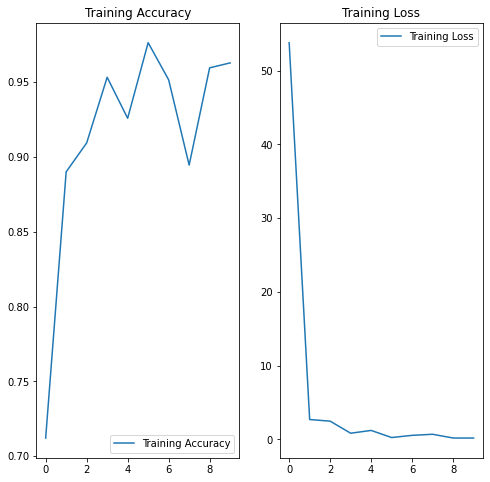

In [75]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

## Discución de Resultados 

Podemos observar que el Accuracy del modelo al probarlo con el set test es de 90.625%. Y podemos observar que en la época número 8 hubo un bajón pero se recompuso en la 9 en adelante.